<b>Import necessary libraries</b>

In [75]:
import pandas as pd
import timeit
import sys
import random
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.ndimage.filters import gaussian_filter1d
sb.set()

<b>Graph Generation</n>

In [5]:
def graphGeneration(vertices, edges):
    adj_matrix = []
    unvisited = []
    
    for i in range(vertices):
        adj_lst = []
        for j in range(vertices):
            adj_lst.append(0)
            if i != j: #prevent self loops
                unvisited.append([i,j]) #append indices of each position in the matrix into unvisited
        adj_matrix.append(adj_lst)
    
    length = len(unvisited) #number of possible points for insertions
    
    while edges > 0: #edge refers to the number of edges left to be inserted
        weight = random.randint(1, 100)
        idx = random.randint(0, length - 1) #choose a random index
        adj_matrix[unvisited[idx][0]][unvisited[idx][1]] = weight
        unvisited.pop(idx) #remove indices from unvisited
        edges -= 1
        length -= 1
    
    return adj_matrix

In [6]:
class GraphAL():
    # Constructor
    def __init__(self, vertices):
        self.V = vertices
        self.matrix = []
        self.list = {}
    
    # Convert Adjacency Matrix To Adjacency List
    def convertMtoL(self):
        for i in range(self.V):                    
            self.list[i] = []
        for i in range(self.V):
            for j in range(self.V):
                if self.matrix[i][j] != 0:
                    temp = [j, self.matrix[i][j]]
                    self.list[i].append(temp)

<b>Part A - Dijkstra Algorithm using Adjacency Matrix as input and using linear search to find minimum for priority queue</b>

In [7]:
def dijkstraAlgo(adj_matrix, source):
    time_start = timeit.default_timer() # START Timer
    
    d = [float('inf') for x in range(len(adj_matrix))] #initialise distance to everything be infinity
    pi = [None for x in range(len(adj_matrix))] #initialise all nodes to have no predecessor
    s = [0 for x in range(len(adj_matrix))] #initialise all nodes to be 0 (unvisited)
    unexplored = [x for x in range(len(adj_matrix))] #add all nodes into unexplored nodes
    
    #Now we are starting with our source node
    d[source] = 0 #set the distance to itself be 0
    pq = [edge for edge in d] #intialise pq to be d; right now, everything will be infinity except for source which is 0
    
    while unexplored: #while there are still vertices unexplored
        shortestVertex = -1 #initialise shortestVertex to be -1 since none of our nodes will be negative
        stillvalid = 0 #check if there are still any vertices connected
        for i in range(len(pq)):
            stillvalid = 0 #check if there are still any vertices connected
            if pq[i] >= 0 and pq[i] != float('inf'):
                stillvalid = 1
                if shortestVertex == -1:
                    shortestVertex = i
                elif pq[i] < pq[shortestVertex]:
                    shortestVertex = i
        if stillvalid == 0:
            break
        
        s[shortestVertex] = 1 #set shortestVertex to be visited; the first iteration will be the source vertex
        pq[shortestVertex] = -1 #set its edge in pq to be -1 so it will not be picked again
        unexplored.remove(shortestVertex) #remove shortestVertex from unexplored vertices
        
        vertices_lst = adj_matrix[shortestVertex]
        for vertex in range(len(vertices_lst)):
            if vertices_lst[vertex] == 0:
                continue
            if s[vertex] != 1 and d[vertex] > d[shortestVertex] + vertices_lst[vertex]:
                d[vertex] = d[shortestVertex] + vertices_lst[vertex]
                pi[vertex] = shortestVertex
                pq[vertex] = d[vertex]
    
    time_stop = timeit.default_timer() # STOP Timer
    
    return time_stop - time_start

In [122]:
def minDistance(dist, sptSet, V):
 
        # Initialize minimum distance for next node
        m = sys.maxsize
        min_index=-1
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(V):
            if dist[u] < m and sptSet[u] == False:
                m = dist[u]
                min_index = u
        return min_index
    
def dijkstra(adj_matrix, source):
        time_start = timeit.default_timer() # START Timer
        V = len(adj_matrix)
        dist = [sys.maxsize] * V
        dist[source] = 0
        sptSet = [False] * V
 
        for cout in range(V):

            x = minDistance(dist, sptSet, V)
            if(x == -1):
                break

            sptSet[x] = True
 

            for y in range(V):
                if adj_matrix[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + adj_matrix[x][y]:
                        dist[y] = dist[x] + adj_matrix[x][y]
                    
        time_stop = timeit.default_timer() # STOP Timer
    
        return time_stop - time_start

<b>Part B - Dijkstra Algorithm using adjacency lists as input and using a heap to find minimum for priority queue (Code from Jabez)</b>

In [9]:
# ===========================================
# Heap Class & Functions
# ===========================================

class Heap():
 
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    # A utility function to swap two nodes
    # of min heap. Needed for min heapify
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    # A standard function to heapify at given idx
    # This function also updates position of nodes
    # when they are swapped.Position is needed
    # for decreaseKey()
    def minHeapify(self, idx):
        smallest = idx
        left = 2*idx + 1
        right = 2*idx + 2
 
        if (left < self.size and
           self.array[left][1]
            < self.array[smallest][1]):
            smallest = left
 
        if (right < self.size and
           self.array[right][1]
            < self.array[smallest][1]):
            smallest = right
 
        # The nodes to be swapped in min
        # heap if idx is not smallest
        if smallest != idx:
 
            # Swap positions
            self.pos[self.array[smallest][0]] = idx
            self.pos[self.array[idx][0]] = smallest
 
            # Swap nodes
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    # Standard function to extract minimum
    # node from heap
    def extractMin(self):
 
        # Return NULL wif heap is empty
        if self.isEmpty() == True:
            return
 
        # Store the root node
        root = self.array[0]
 
        # Replace root node with last node
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Update position of last node
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root

    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
 
        # Get the index of v in  heap array
 
        i = self.pos[v]
 
        # Get the node and update its dist value
        self.array[i][1] = dist
 
        # Travel up while the complete tree is
        # not heapified. This is a O(Logn) loop
        while (i > 0 and self.array[i][1] <
                  self.array[(i - 1) // 2][1]):
 
            # Swap this node with its parent
            self.pos[ self.array[i][0] ] = (i-1)//2
            self.pos[ self.array[(i-1)//2][0] ] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            # move to parent index
            i = (i - 1) // 2;
 
    # A utility function to check if a given
    # vertex 'v' is in min heap or not
    def isInMinHeap(self, v):
 
        if self.pos[v] < self.size:
            return True
        return False

In [10]:
# ====================================
# Dijkstra START
# ====================================
def dijkstraAlgoL(GraphAL, source):
    time_start = timeit.default_timer() # START Timer
    
    V = GraphAL.V
    distances = [sys.maxsize for v in range(V)] # Array to track distance | Original distances are set to infinity
    predecessors = [None for v in range(V)] # Array to store predecessors of each vertex | Set to none at start
    S = [0 for v in range(V)] # Array to track if shortest path has been determined | Set to False/0 at start
    minHeap = Heap() # Initialise Heap as priority queue
    
    for v in range(V):
        minHeap.array.append([v, distances[v]]) # Add the vertices to heap
        minHeap.pos.append(v)
    
    minHeap.pos[source] = source # Source will always be 0
    distances[source] = 0 # Initialise distance of source to 0 for it to be extracted first
    minHeap.decreaseKey(source, distances[source]) # Update distance in heap
    
    minHeap.size = V # Number of vertices in heap will be V at the start
    
    while minHeap.isEmpty() == False:
        minNode = minHeap.extractMin() # Extract the minimum node
        minVertex = minNode[0] # Save vertex number
        
        # Transverse through all adjacent nodes to minVertex
        for v, d in GraphAL.list[minVertex]:
            if not S[v]:
                if (distances[minVertex] + d) < distances[v]:     
                    distances[v] = distances[minVertex] + d
                    predecessors[v] = minVertex
                    minHeap.decreaseKey(v, distances[v])       
        S[minVertex] = True
            
    time_stop = timeit.default_timer() # STOP Timer
    
    return time_stop - time_start
# ====================================
# END
# ====================================

<b>Part C - Comparison between the two algorithm</b>

Generate adjacency matrix of with 10, 50 and 100 vertices

In [36]:
adj_matrix_collection10 = []
for i in range(1, 10 * 10 - 10):
    adj_matrix_collection10.append(graphGeneration(10, i))

graph_collection10 = []
for adj_matrix in adj_matrix_collection10:
    graph = GraphAL(10)
    graph.matrix = adj_matrix
    graph.convertMtoL()
    graph_collection10.append(graph)

In [61]:
adj_matrix_collection50 = []
for i in range(1, 50 * 50 - 50 + 1):
    adj_matrix_collection50.append(graphGeneration(50, i))

graph_collection50 = []
for adj_matrix in adj_matrix_collection50:
    graph = GraphAL(50)
    graph.matrix = adj_matrix
    graph.convertMtoL()
    graph_collection50.append(graph)

In [153]:
adj_matrix_collection100 = []
for i in range(1, 100 * 100 - 100 + 1):
    adj_matrix_collection100.append(graphGeneration(100, i))

graph_collection100 = []
for adj_matrix in adj_matrix_collection100:
    graph = GraphAL(100)
    graph.matrix = adj_matrix
    graph.convertMtoL()
    graph_collection100.append(graph)

Run algorithms on matrices and lists and save timings to a list

In [130]:
timingM10 = []
timingL10 = []

for graph in graph_collection10:
    timingL10.append(dijkstraAlgoL(graph, 5))
    timingM10.append(dijkstra(graph.matrix, 5))

In [127]:
timingM50 = []
timingL50 = []

for graph in graph_collection50:
    timingL50.append(dijkstraAlgoL(graph, 28))
    timingM50.append(dijkstra(graph.matrix, 28))

In [178]:
timingM100 = []
timingL100 = []

for graph in graph_collection100:
    timingM100.append(dijkstra(graph.matrix, 50))
    timingL100.append(dijkstraAlgoL(graph, 50))

Plot graphs based on timings

<AxesSubplot:>

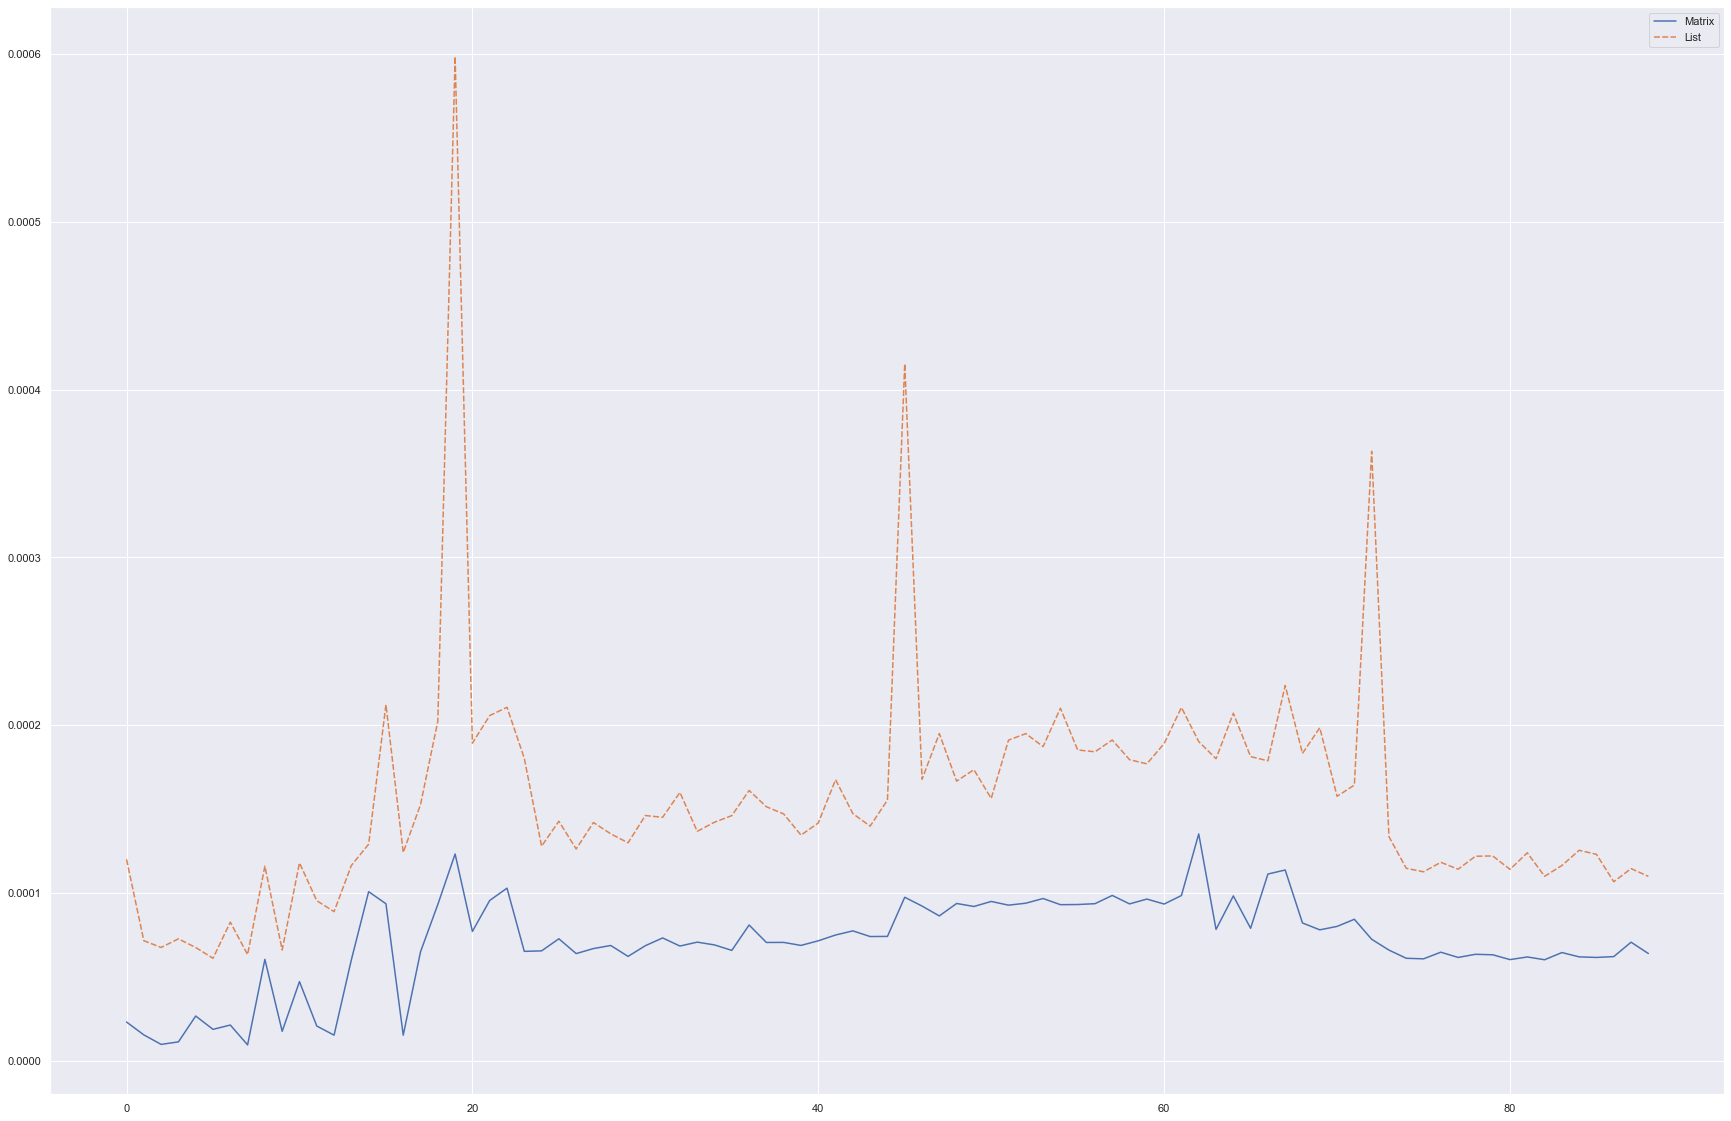

In [131]:
time10 = pd.DataFrame({"Matrix": timingM10, "List": timingL10})

f, axes = plt.subplots(figsize=(30,20))
sb.lineplot(data = time10, ax = axes)

<AxesSubplot:>

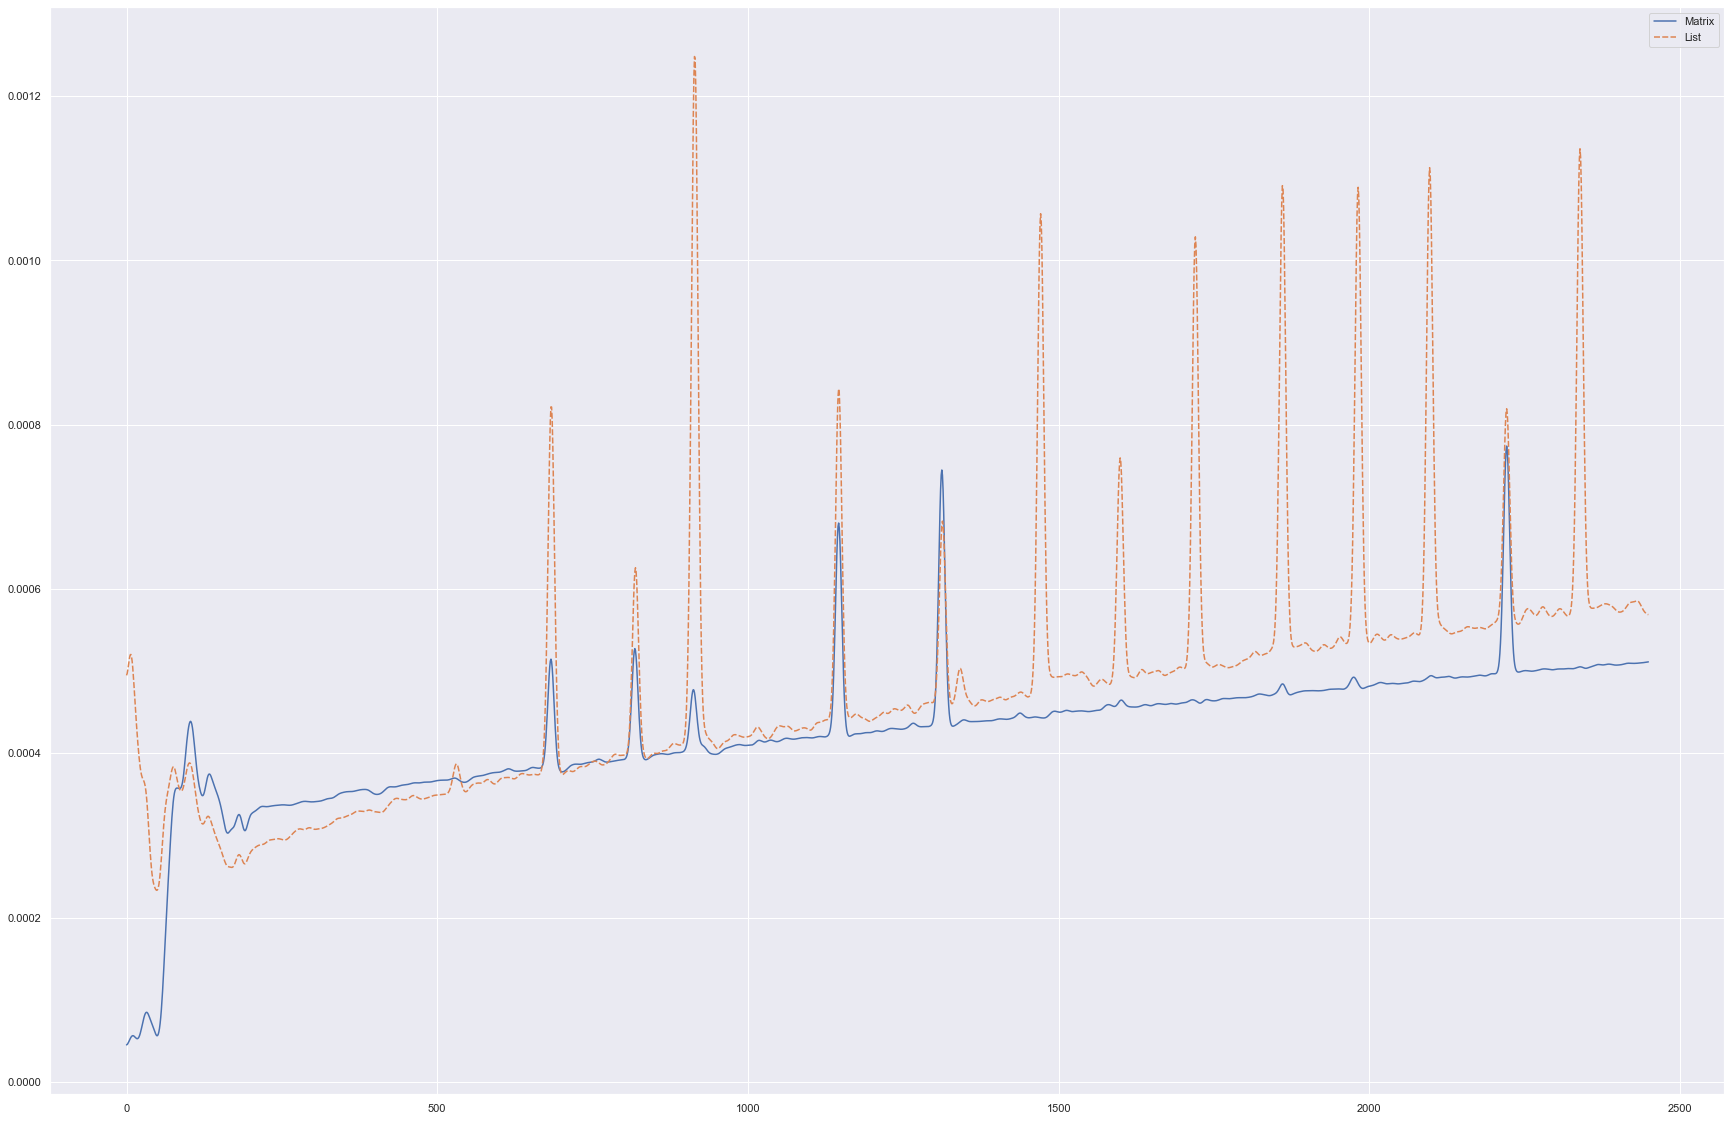

In [129]:
timingM50n = gaussian_filter1d(timingM50, sigma=5)
timingL50n = gaussian_filter1d(timingL50, sigma=5)
time50 = pd.DataFrame({"Matrix": timingM50n, "List": timingL50n})

f, axes = plt.subplots(figsize=(30,20))
sb.lineplot(data = time50, ax = axes)

<AxesSubplot:>

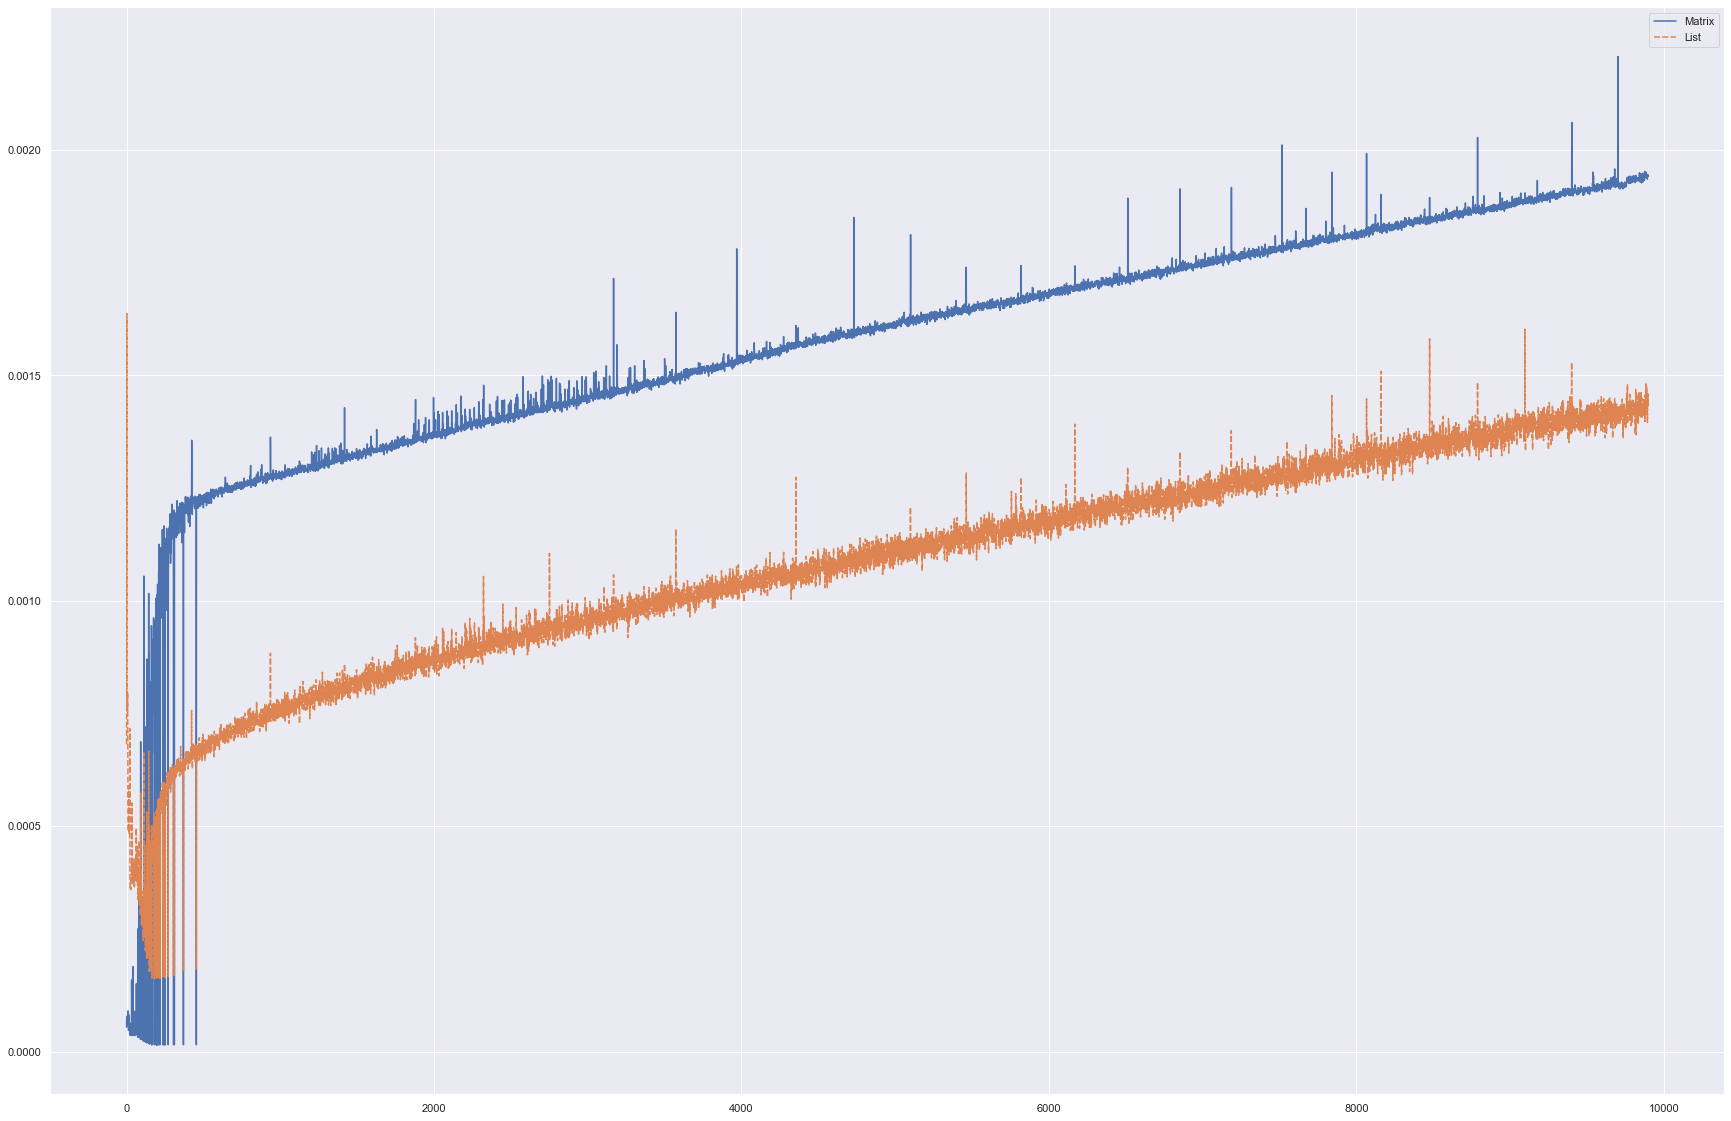

In [179]:
timingM100n = gaussian_filter1d(timingM100, sigma=3)
timingL100n = gaussian_filter1d(timingL100, sigma=3)
time100 = pd.DataFrame({"Matrix": timingM100, "List": timingL100})

f, axes = plt.subplots(figsize=(30,20))
sb.lineplot(data = time100, ax = axes)